In [ ]:
from google.colab import drive;
drive.mount("/content/gdrive");

Mounted at /content/gdrive


## python libraries

In [ ]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

## load dataset

In [ ]:

df = pd.read_csv("/content/gdrive/MyDrive/pattern-project/tweet_emotions.csv");
print(df.head(5));

     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...


## sentiment count plot

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64
[0.21595  0.211475 0.130225 0.129125 0.09605  0.054675 0.0444   0.03815
 0.033075 0.020675 0.018975 0.004475 0.00275 ]
[0.00275, 0.004475, 0.018975, 0.020675, 0.033075, 0.03815, 0.0444, 0.054675, 0.09605, 0.129125]
['neutral', 'worry', 'happiness', 'sadness', 'love', 'surprise', 'fun', 'relief', 'hate', 'empty']
neutral      8638
worry        8459
happiness    5209
sadness      5165
love         3842
surprise     2187
fun          1776
relief       1526
hate         1323
empty         827
Name: sentiment, dtype: int64


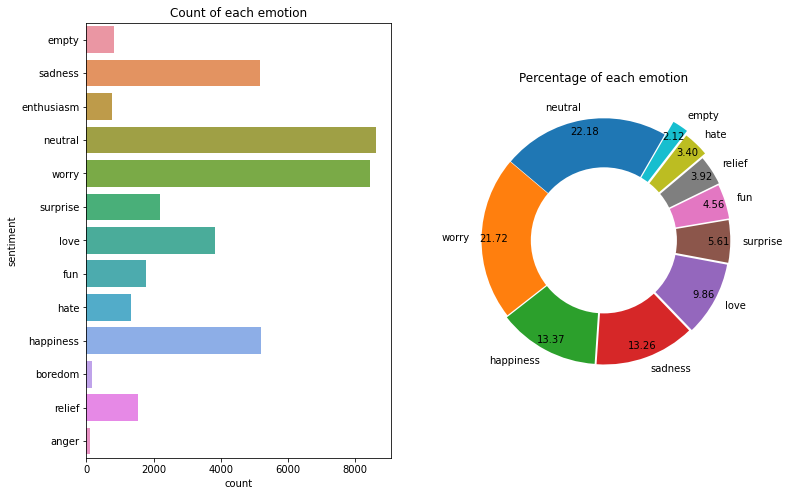

In [ ]:
col = 'sentiment'

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
print(df[col].dropna().value_counts());
print((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts()))));
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:10]
print(explode);
labels = ['neutral','worry','happiness','sadness','love','surprise','fun','relief','hate','empty'];
print(labels);
sizes = df[col].value_counts()[:10]
print(sizes)
#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%.2f', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

## replace sentiments

In [ ]:
df["sentiment"].replace({"love": "happiness","fun":"happiness","enthusiasm":"happiness","relief":"neutral","empty":"sadness","boredom":"sadness","hate":"anger"}, inplace=True)

## replaced sentiments count plot

happiness    11586
neutral      10164
worry         8459
sadness       6171
surprise      2187
anger         1433
Name: sentiment, dtype: int64
[0.28965  0.2541   0.211475 0.154275 0.054675 0.035825]
[0.035825, 0.054675, 0.154275, 0.211475, 0.2541, 0.28965]
['happiness', 'neutral', 'worry', 'sadness', 'surprise', 'anger']
happiness    11586
neutral      10164
worry         8459
sadness       6171
surprise      2187
anger         1433
Name: sentiment, dtype: int64


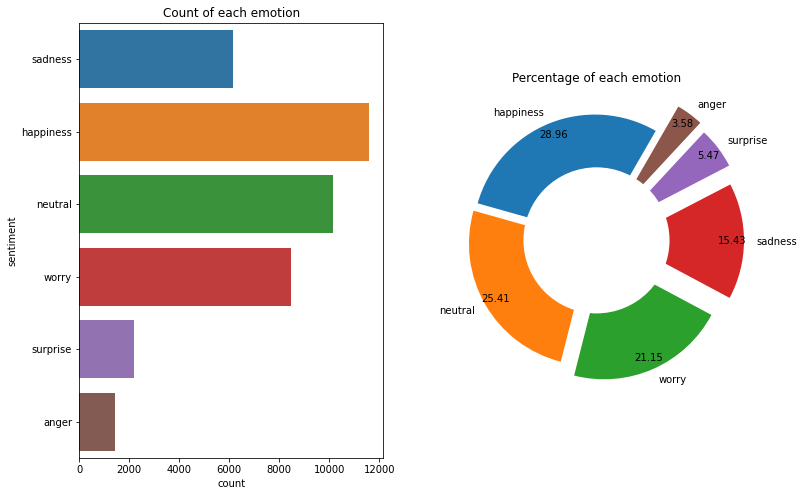

In [ ]:
col = 'sentiment'

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
print(df[col].dropna().value_counts());
print((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts()))));
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])
print(explode);
labels = ['happiness','neutral','worry','sadness','surprise','anger'];
print(labels);
sizes = df[col].value_counts()
print(sizes)
#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%.2f', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

## character and number of words in each content

In [ ]:
df['char_length'] = df['content'].apply(lambda x : len(x))
df['token_length'] = df['content'].apply(lambda x : len(x.split(" ")))
print(df);


         tweet_id  sentiment  ... char_length  token_length
0      1956967341    sadness  ...          92            19
1      1956967666    sadness  ...          60            11
2      1956967696    sadness  ...          35             3
3      1956967789  happiness  ...          36             7
4      1956968416    neutral  ...          86            15
...           ...        ...  ...         ...           ...
39995  1753918954    neutral  ...          16             1
39996  1753919001  happiness  ...          30             7
39997  1753919005  happiness  ...         123            25
39998  1753919043  happiness  ...         122            20
39999  1753919049  happiness  ...         132            25

[40000 rows x 5 columns]


## number of characters and token plot

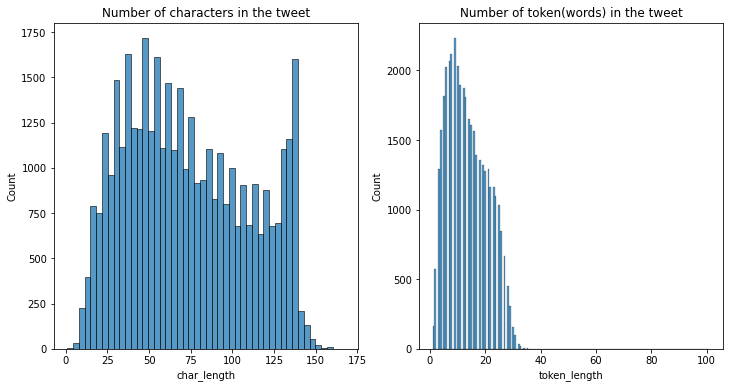

In [ ]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.histplot(df['char_length'], ax=ax1)
sns.histplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()

## Correctly generate plurals, singular nouns, ordinals, indefinite articles; convert numbers to words.


In [ ]:
!pip install inflect

## expanding english words


In [ ]:
!pip install contractions

## scraping after a long time 

In [ ]:
!pip install bs4

##  Data preparation and text-preprocessing libraries


In [ ]:

from sklearn.preprocessing import LabelEncoder;
from sklearn.model_selection import train_test_split;
import nltk;
import inflect;
import contractions;
from bs4 import BeautifulSoup;
import re, string, unicodedata;
from nltk import word_tokenize, sent_tokenize;
from nltk.corpus import stopwords;
from nltk.stem import LancasterStemmer, WordNetLemmatizer;
nltk.download('punkt');
nltk.download('stopwords');
nltk.download('wordnet');

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## text preprocessing

In [ ]:


def text_preprocessing_platform(df, text_col, remove_stopwords=True):
    
    ## Define functions for individual steps
    # First function is used to denoise text
    def denoise_text(text):
        # Strip html if any. For ex. removing <html>, <p> tags
        soup = BeautifulSoup(text, "html.parser");
        text = soup.get_text();
        # Replace contractions in the text. For ex. didn't -> did not
        text = contractions.fix(text);
        return text;
    
    ## Next step is text-normalization
    
    # Text normalization includes many steps.
    
    # Each function below serves a step.
    
    
    def remove_non_ascii(words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = [];
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore');
            new_words.append(new_word);
        return new_words;
    
    
    def to_lowercase(words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = [];
        for word in words:
            new_word = word.lower();
            new_words.append(new_word);
        return new_words;
    
    
    def remove_punctuation(words):
        """Remove punctuation from list of tokenized words"""
        new_words = [];
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word);
            if new_word != '':
                new_words.append(new_word);
        return new_words;
    
    
    def replace_numbers(words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine();
        new_words = [];
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word);
                new_words.append(new_word);
            else:
                new_words.append(word);
        return new_words;
    
    
    def remove_stopwords(words):
        """Remove stop words from list of tokenized words"""
        new_words = [];
        for word in words:
            if word not in stopwords.words('english'):
                new_words.append(word);
        return new_words;
    
    
    def stem_words(words):
        """Stem words in list of tokenized words"""
        stemmer = LancasterStemmer();
        stems = [];
        for word in words:
            stem = stemmer.stem(word);
            stems.append(stem);
        return stems;
    
    
    def lemmatize_verbs(words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer();
        lemmas = [];
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v');
            lemmas.append(lemma);
        return lemmas;
    
    
    ### A wrap-up function for normalization
    def normalize_text(words, remove_stopwords):
        words = remove_non_ascii(words);
        words = to_lowercase(words);
        words = remove_punctuation(words);
        words = replace_numbers(words);
        if remove_stopwords:
            words = remove_stopwords(words);
        words = stem_words(words)
        # words = lemmatize_verbs(words);
        return words;
    
    # All above functions work on word tokens we need a tokenizer
    
    # Tokenize tweet into words
    def tokenize(text):
        return nltk.word_tokenize(text);
    
    
    # A overall wrap-up function
    def text_prepare(text):
        text = denoise_text(text);
        text = ' '.join([x for x in normalize_text(tokenize(text), remove_stopwords)]);
        return text;
    
    # run every-step
    df[text_col] = [text_prepare(x) for x in df[text_col]];
    
    
    # return processed df
    return df;

## before and after text preprocessings

Before Text Preprocessing


,content
0,@tiffanylue i know i was listenin to bad habi...
1,Layin n bed with a headache ughhhh...waitin o...
2,Funeral ceremony...gloomy friday...
3,wants to hang out with friends SOON!
4,@dannycastillo We want to trade with someone w...


(40000, 5)
       tweet_id sentiment content  char_length  token_length
340  1957042734   sadness       0            1             1


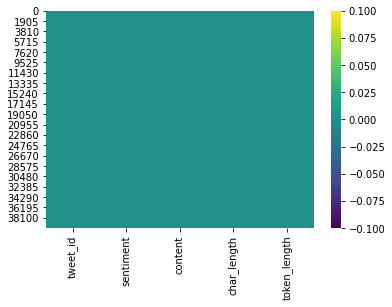

After Text Preprocessing


,content
0,tiffanylu know listenin bad habit ear start fr...
1,layin n bed headach ughhhh waitin cal
2,fun ceremony gloom friday
3,want hang friend soon
4,dannycastillo want trad someon houston ticket on


(40000, 5)
       tweet_id sentiment content  char_length  token_length
340  1957042734   sadness    zero            1             1


In [ ]:
print("Before Text Preprocessing")
display(df.head()[['content']])
print(df.shape);
print(df.loc[[340]])
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()
processed_df = text_preprocessing_platform(df, 'content', remove_stopwords=False)
print("After Text Preprocessing")
display(processed_df.head()[['content']])
print(processed_df.shape);
print(processed_df.loc[[340]]);

processed_df.to_csv('After_cleaning.csv');

## model and evaluation metrices libraries

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer;
from sklearn.model_selection import train_test_split;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.metrics import classification_report;
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve;

## variable declaration

In [ ]:
target = 'sentiment'

## Tf-Idf of tweet content

In [ ]:
tf = TfidfVectorizer();
print(tf.fit_transform(processed_df['content'])[0])
text_tf= tf.fit_transform(processed_df['content']);
# feature extract
feature_names = tf.get_feature_names()
print(feature_names);
doc = 0
# for first doc
feature_index =text_tf[doc,:].nonzero()[1]
tfidf_scores = zip(feature_index, [text_tf[doc, x] for x in feature_index])
print(tfidf_scores);
# tfidf score for first doc with featue , tfidf value
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
  print (w, s);

  (0, 26245)	0.30062780138050477
  (0, 12666)	0.35247282448223094
  (0, 32598)	0.2392740412784284
  (0, 10558)	0.25096838154601325
  (0, 14345)	0.41426400630676213
  (0, 3340)	0.2261882446698737
  (0, 20418)	0.41001575368798915
  (0, 19188)	0.19509644104547547
  (0, 34775)	0.4860013468540983
['01theone', '079i12', '09casper', '0_o', '0f', '0hhh', '0k', '0n', '0omiriamo0', '0oze', '0rpm', '0s', '0ut', '0xcafebabe', '10000th', '1000th', '1000x', '100msgsecond', '100rabh', '100th', '100word', '100x', '1011pm', '1027kiisfm', '1030am', '1030pm', '103ffevered', '1045chumfm', '1050i', '105all', '106jackfm', '10am', '10and', '10c', '10days', '10dolla', '10gb', '10hour', '10jaffa', '10k', '10m', '10min', '10mins', '10mm', '10p', '10pm', '10th', '10ty', '10veisonitsway', '10yearold', '10yr', '1110pm', '111am', '1155hours', '115am', '117th', '11am', '11e', '11hunabku11', '11pm', '11stupid', '11th', '11yo', '1206am', '120am', '120mm', '121908inlove', '1230am', '1230pm', '123pricecheck', '1245am', 

## final dataset after modification

In [ ]:
train_final = processed_df[['content', 'sentiment']]
print("Train DataFrame")
display(train_final.head(3))

Train DataFrame


,content,sentiment
0,tiffanylu know listenin bad habit ear start fr...,sadness
1,layin n bed headach ughhhh waitin cal,sadness
2,fun ceremony gloom friday,sadness


## implementing X and Y from dataset

In [ ]:
le = LabelEncoder()
train_final['sentiment'] = le.fit_transform(train_final['sentiment'])
df = train_final
x=text_tf;
y =df[target]
print(x);
print(y);

  (0, 26245)	0.30062780138050477
  (0, 12666)	0.35247282448223094
  (0, 32598)	0.2392740412784284
  (0, 10558)	0.25096838154601325
  (0, 14345)	0.41426400630676213
  (0, 3340)	0.2261882446698737
  (0, 20418)	0.41001575368798915
  (0, 19188)	0.19509644104547547
  (0, 34775)	0.4860013468540983
  (1, 5958)	0.28233552300652254
  (1, 37805)	0.45342388821821644
  (1, 36793)	0.480878785997306
  (1, 14741)	0.3348996211726067
  (1, 3802)	0.27614236146183446
  (1, 19833)	0.5431727746897766
  (2, 12761)	0.3947686755198624
  (2, 13638)	0.558883116331693
  (2, 6540)	0.646345528558391
  (2, 12908)	0.3377052158617676
  (3, 32043)	0.503831373963546
  (3, 12768)	0.46989778024964585
  (3, 14513)	0.6149998298636825
  (3, 37873)	0.383569070695361
  (4, 25610)	0.2126593026393554
  (4, 34740)	0.34560191660617007
  :	:
  (39997, 31987)	0.318412063770104
  (39998, 39013)	0.41265831899780975
  (39998, 37923)	0.33901269267474177
  (39998, 24633)	0.3864252176024612
  (39998, 3751)	0.23874973459733614
  (39998, 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## model libraries

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## oversampling Adasyn

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Adasyn implementation to increase minority class data

In [ ]:
adasyn_over_sample = ADASYN(random_state=11, n_neighbors=5,sampling_strategy='minority')

print(f"Initial set observations {x.shape[0]}")
print(f"Initial set target classes {len(set(y))}")
x_ada, y_ada = adasyn_over_sample.fit_resample(x, y)
print(f"Modified set observations {x_ada.shape[0]}")
print(f"Modified set target classes {len(set(y_ada))}")

Initial set observations 40000
Initial set target classes 6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Modified set observations 50422
Modified set target classes 6


## normalize oversampled X data

In [ ]:
from sklearn.preprocessing import normalize
x_ada_norm = normalize(x_ada);
print(x_ada_norm);


  (0, 26245)	0.30062780138050477
  (0, 12666)	0.35247282448223094
  (0, 32598)	0.2392740412784284
  (0, 10558)	0.25096838154601325
  (0, 14345)	0.41426400630676213
  (0, 3340)	0.2261882446698737
  (0, 20418)	0.41001575368798915
  (0, 19188)	0.19509644104547547
  (0, 34775)	0.4860013468540983
  (1, 5958)	0.2823355230065226
  (1, 37805)	0.4534238882182165
  (1, 36793)	0.48087878599730605
  (1, 14741)	0.33489962117260674
  (1, 3802)	0.2761423614618345
  (1, 19833)	0.5431727746897768
  (2, 12761)	0.39476867551986244
  (2, 13638)	0.5588831163316931
  (2, 6540)	0.6463455285583911
  (2, 12908)	0.33770521586176766
  (3, 32043)	0.503831373963546
  (3, 12768)	0.46989778024964585
  (3, 14513)	0.6149998298636825
  (3, 37873)	0.383569070695361
  (4, 25610)	0.2126593026393554
  (4, 34740)	0.34560191660617007
  :	:
  (50411, 32080)	0.29555460277480156
  (50411, 33658)	0.1638453234641085
  (50411, 33681)	0.1552479932499872
  (50411, 35776)	0.25075184893525904
  (50411, 39488)	0.23918849910857823
  (50

## train-test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_ada_norm,y_ada, test_size=0.3, random_state=42);

## RandomForestClassifier model 

In [ ]:
dt = RandomForestClassifier(random_state=42, verbose=2, class_weight='balanced_subsample',n_estimators=100,criterion='gini')
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished


## accuracy RF

In [ ]:
score = round(accuracy_score(y_test,preddt)*100,2)
print("Score:",score)

Score: 55.87


## confusion matrix RF

In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
cnf_matrix = confusion_matrix(y_test,preddt);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[3485    6   35    0    0    9]
 [  59 2240  836   86   18  222]
 [  66  823 1619  162   26  368]
 [ 125  390  588  404   13  366]
 [  23  211  265   41   17   94]
 [ 128  555  867  280   13  687]]


## plot confusion matrix RF

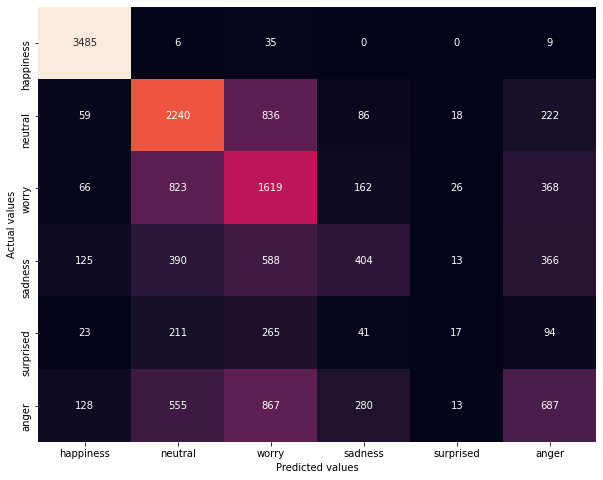

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

## evaluation merices RF

In [ ]:
print("Classification Report:")
print(classification_report(y_test,preddt))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3535
           1       0.53      0.65      0.58      3461
           2       0.38      0.53      0.45      3064
           3       0.42      0.21      0.28      1886
           4       0.20      0.03      0.05       651
           5       0.39      0.27      0.32      2530

    accuracy                           0.56     15127
   macro avg       0.47      0.45      0.44     15127
weighted avg       0.53      0.56      0.53     15127



## SVM

In [ ]:
svc=SVC(C=100.0) 
# fit classifier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred=svc.predict(x_test)

## accuracy SVM

In [ ]:
score = round(accuracy_score(y_test,y_pred)*100,2)
print("Score:",score)

Score: 57.0


## confusion matrix SVM

In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y_pred))
cnf_matrix = confusion_matrix(y_test,y_pred);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[3526    2    6    1    0    0]
 [  22 2183  822  110   14  310]
 [  20  826 1539  168   12  499]
 [  50  317  558  445    4  512]
 [  10  210  240   43   16  132]
 [  54  463  761  324   14  914]]


## plot confusion matrix SVM

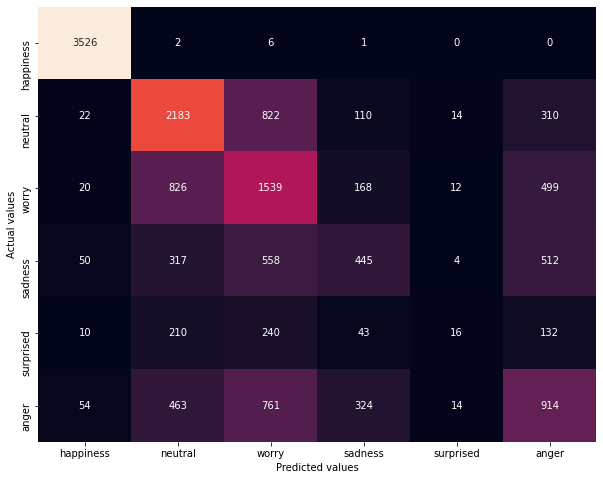

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

## evaluation metrices SVM

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3535
           1       0.55      0.63      0.59      3461
           2       0.39      0.50      0.44      3064
           3       0.41      0.24      0.30      1886
           4       0.27      0.02      0.05       651
           5       0.39      0.36      0.37      2530

    accuracy                           0.57     15127
   macro avg       0.49      0.46      0.45     15127
weighted avg       0.55      0.57      0.55     15127



## XGBC eXtreme Gradient Boosting (reduce overfitting)

In [ ]:
xgbc = XGBClassifier(max_depth=16, n_estimators=1000,nthread = 6)
xgbc.fit(x_train,y_train)
prediction_xgb = xgbc.predict(x_test)

accuracy XGBoost

In [ ]:
score = round(accuracy_score(y_test,prediction_xgb)*100,2)
print("Score:",score)

Score: 54.47


## consfusion matrix XGBoost

In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,prediction_xgb))
cnf_matrix = confusion_matrix(y_test,prediction_xgb);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[3329   40   90   30    2   44]
 [  52 2110  782  127   42  348]
 [  77  772 1537  202   30  446]
 [ 111  323  509  417   23  503]
 [  27  204  223   42   29  126]
 [ 114  468  738  359   34  817]]


## plot confusion matrix XGBoost

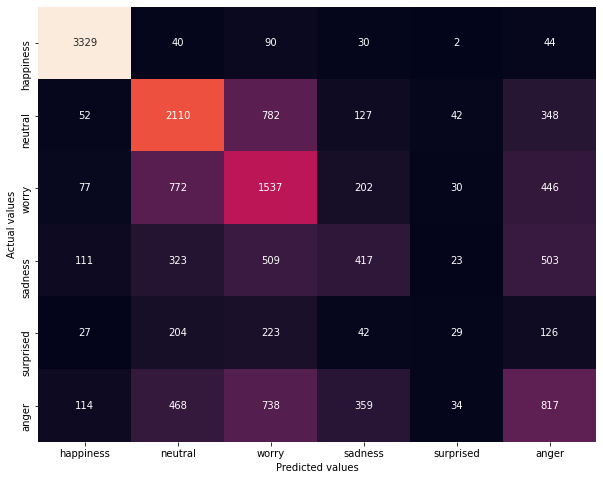

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

## evaluation metrics XGBoost


In [ ]:
print("Classification Report:")
print(classification_report(y_test,prediction_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3535
           1       0.54      0.61      0.57      3461
           2       0.40      0.50      0.44      3064
           3       0.35      0.22      0.27      1886
           4       0.18      0.04      0.07       651
           5       0.36      0.32      0.34      2530

    accuracy                           0.54     15127
   macro avg       0.45      0.44      0.44     15127
weighted avg       0.52      0.54      0.53     15127



## logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
logreg.fit(x_train, y_train)
y_pred_test = logreg.predict(x_test)

In [ ]:
score = round(accuracy_score(y_test,y_pred_test)*100,2)
print("Score:",score)

Score: 55.01


In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y_pred_test))
cnf_matrix = confusion_matrix(y_test,y_pred_test);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[3351   75   60   17    0   32]
 [ 114 2283  773   62    3  226]
 [ 163  845 1556  113    0  387]
 [ 272  334  537  338    3  402]
 [  53  224  235   23    7  109]
 [ 313  474  746  205    6  786]]


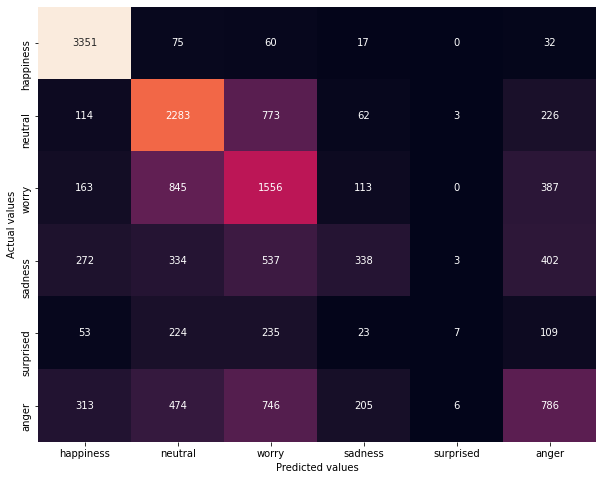

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      3535
           1       0.54      0.66      0.59      3461
           2       0.40      0.51      0.45      3064
           3       0.45      0.18      0.26      1886
           4       0.37      0.01      0.02       651
           5       0.40      0.31      0.35      2530

    accuracy                           0.55     15127
   macro avg       0.49      0.44      0.42     15127
weighted avg       0.53      0.55      0.52     15127



## sgd classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(verbose = 2, random_state = 42)

In [ ]:
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 38.96, NNZs: 10001, Bias: -1.360752, T: 35295, Avg. loss: 0.272953
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 37.98, NNZs: 12247, Bias: -1.304495, T: 70590, Avg. loss: 0.211329
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 37.71, NNZs: 13076, Bias: -1.281281, T: 105885, Avg. loss: 0.201138
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 37.53, NNZs: 13418, Bias: -1.263061, T: 141180, Avg. loss: 0.196952
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 37.47, NNZs: 13621, Bias: -1.250766, T: 176475, Avg. loss: 0.194395
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 37.48, NNZs: 13735, Bias: -1.247708, T: 211770, Avg. loss: 0.192965
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 37.46, NNZs: 13823, Bias: -1.239651, T: 247065, Avg. loss: 0.191725
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 37.47, NNZs: 13869, Bias: -1.236590, T: 282360, Avg. loss: 0.191104
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 37.46, NNZs: 13895, Bias:

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
y_pred_sgd = model.predict(x_test)

In [ ]:
score = round(accuracy_score(y_test,y_pred_sgd)*100,2)
print("Score:",score)

Score: 51.85


In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y_pred_sgd))
cnf_matrix = confusion_matrix(y_test,y_pred_sgd);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[3449   61    8    8    0    9]
 [ 245 2532  407   88    9  180]
 [ 429 1147 1002  153   14  319]
 [ 474  433  364  336    9  270]
 [ 118  256  160   37   11   69]
 [ 631  622  498  251   14  514]]


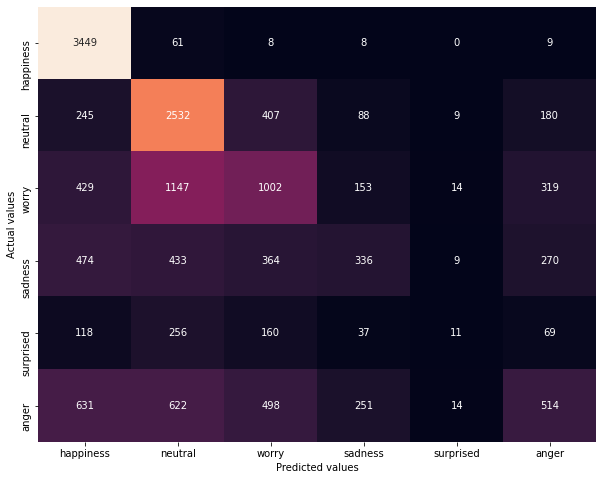

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y_pred_sgd))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.98      0.78      3535
           1       0.50      0.73      0.59      3461
           2       0.41      0.33      0.36      3064
           3       0.38      0.18      0.24      1886
           4       0.19      0.02      0.03       651
           5       0.38      0.20      0.26      2530

    accuracy                           0.52     15127
   macro avg       0.42      0.41      0.38     15127
weighted avg       0.47      0.52      0.47     15127



## Naive Bayes(Bernouli and multinomial)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
MNB = MultinomialNB()
BNB = BernoulliNB()

In [ ]:
BNB.fit(x_train, y_train)
y2_BNB_model = BNB.predict(x_test)

In [ ]:
score = round(accuracy_score(y_test,y2_BNB_model)*100,2)
print("Score:",score)

Score: 51.22


In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y2_BNB_model))
cnf_matrix = confusion_matrix(y_test,y2_BNB_model);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[3367   92   67    0    0    9]
 [ 197 2450  668   10    0  136]
 [ 239 1224 1371    8    0  222]
 [ 350  570  623   22    0  321]
 [  74  290  210    0    0   77]
 [ 433  746  801   12    0  538]]


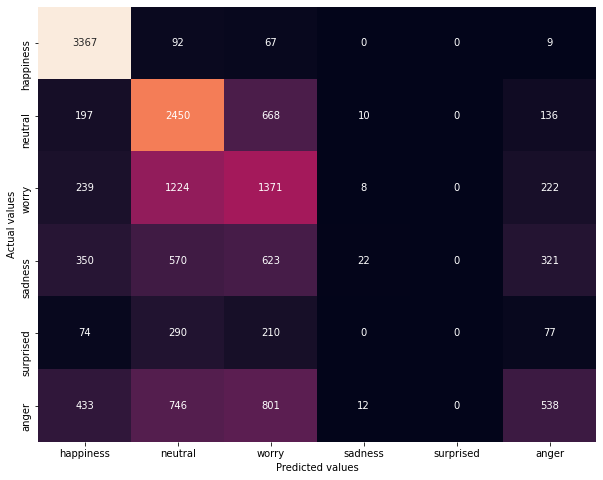

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y2_BNB_model))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.95      0.82      3535
           1       0.46      0.71      0.55      3461
           2       0.37      0.45      0.40      3064
           3       0.42      0.01      0.02      1886
           4       0.00      0.00      0.00       651
           5       0.41      0.21      0.28      2530

    accuracy                           0.51     15127
   macro avg       0.40      0.39      0.35     15127
weighted avg       0.47      0.51      0.45     15127



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Linear and Non linear SVC

In [ ]:
from sklearn.svm import LinearSVC, NuSVC


In [ ]:

LSVC = LinearSVC()
NSVC = NuSVC(kernel='rbf',nu=0.01,verbose = 2)


In [ ]:
LSVC.fit(x_train,y_train)
y2_LSVC_model = LSVC.predict(x_test)

In [ ]:
score = round(accuracy_score(y_test,y2_LSVC_model)*100,2)
print("Score:",score)

Score: 53.77


In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y2_LSVC_model))
cnf_matrix = confusion_matrix(y_test,y2_LSVC_model);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[3514    6    6    6    0    3]
 [  99 2108  717  162   31  344]
 [ 117  869 1284  239   38  517]
 [ 203  323  480  419   17  444]
 [  43  215  210   47   22  114]
 [ 234  506  647  326   30  787]]


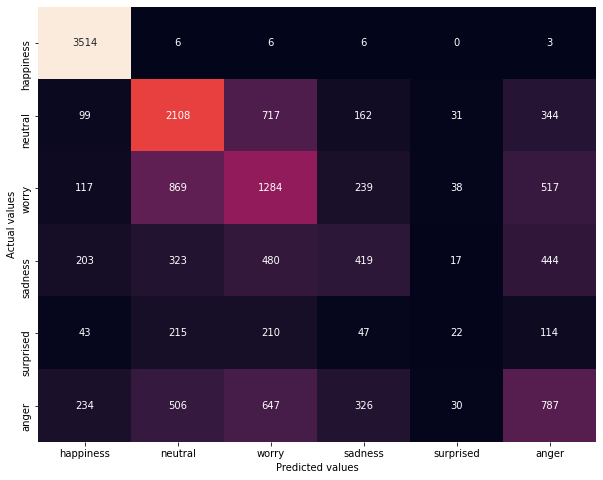

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y2_LSVC_model))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.91      3535
           1       0.52      0.61      0.56      3461
           2       0.38      0.42      0.40      3064
           3       0.35      0.22      0.27      1886
           4       0.16      0.03      0.06       651
           5       0.36      0.31      0.33      2530

    accuracy                           0.54     15127
   macro avg       0.43      0.43      0.42     15127
weighted avg       0.50      0.54      0.51     15127



In [ ]:
NSVC.fit(x_train,y_train)
y2_NSVC_model = NSVC.predict(x_test)

[LibSVM]

In [ ]:
score = round(accuracy_score(y_test,y2_NSVC_model)*100,2)
print("Score:",score)

Score: 56.98


In [ ]:
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y2_NSVC_model))
cnf_matrix = confusion_matrix(y_test,y2_NSVC_model);
labels = ['happiness', 'neutral', 'worry','sadness','surprised','anger'];
cm1 = pd.DataFrame(cnf_matrix, index = labels, columns = labels)

Confusion Matrix for Decision Tree:
[[3526    2    6    1    0    0]
 [  22 2187  825  106   14  307]
 [  20  824 1540  164   12  504]
 [  48  314  561  440    4  519]
 [  10  204  248   43   16  130]
 [  54  463  769  320   13  911]]


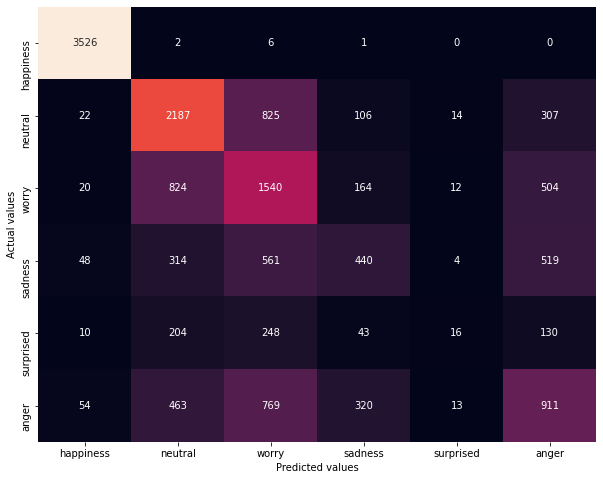

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test,y2_NSVC_model))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3535
           1       0.55      0.63      0.59      3461
           2       0.39      0.50      0.44      3064
           3       0.41      0.23      0.30      1886
           4       0.27      0.02      0.05       651
           5       0.38      0.36      0.37      2530

    accuracy                           0.57     15127
   macro avg       0.49      0.46      0.45     15127
weighted avg       0.56      0.57      0.55     15127



## end of dataset 1  highest accuracy svm and non linear svm

